## Import Libraries

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Define Dataset

In [180]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Exploratory Analysis

### Understand Dataset

In [181]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


5 categorical columns.

No null values.

**RestingBP** represents the resting blood pressure (mmHg).  
**Cholesterol** represents the serum cholesterol level (mg/dL).  
**FastingBS** indicates if fasting blood sugar is greater than 120 mg/dL.  
**RestingECG** results of the resting electrocardiogram test.  
**MaxHR** represents the maximum heart rate achieved.  
**ExerciseAngina** indicates if exercise-induced angina is present.  
**Oldpeak** represents the ST depression induced by exercise relative to rest (often used to measure ischemia).  
**ST_Slope** represents the slope of the peak exercise ST segment.  
**HeartDisease** is the target column

### Descriptive Analysis

#### Numerical columns

In [183]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Validate Features Range**

- **Age**: 0 to 120 years  
  **Validated**

- **RestingBP (Resting Blood Pressure)**: 0 to 250 mmHg  
  - Typical systolic blood pressure values.  
  - *Values below 90 or above 200 are clinically abnormal.* 
  **Validated**

- **Cholesterol**: 0 to 600 mg/dL  
  - Normal and extreme clinical levels.  
  - *Values above 300 are rare and usually indicate a serious condition.*  
  **Max observed: 603**

- **FastingBS (Fasting Blood Sugar)**: [0, 1]  
  - Binary indicator:  
    - `1` for fasting blood sugar > 120 mg/dL  
    - `0` otherwise.  
  **Validated**

- **MaxHR (Maximum Heart Rate)**: 0 to 220 bpm  
  - Calculated roughly as 220 minus age, though extremes are possible.  
  - *Typical values range from 60 bpm (resting) to around 200 bpm (during exercise).*
  **Validated**

- **Oldpeak**: 0 to 10.0  
  - Represents ST depression or elevation, typically measured in mm.  
  - *Values above 5.0 are rare and clinically significant.*  
  **Negative values observed.**

- **HeartDisease**: [0, 1]  
  - Binary indicator:  
    - `1` for presence of heart disease  
    - `0` for absence.


For the unexpected values:

- **Cholesterol**: 0 to 600 mg/dL But **603** observed. 

- **Oldpeak**: 0 to 10.0  has **Negative values**

In [184]:
df['Cholesterol'] [ df['Cholesterol'] > 600].count()

1

**Since it is onlyone value, we will decide what to do with it later in outlier detection.**

In [185]:
df['Oldpeak'] [ df['Oldpeak'] < 0].count()

13

In [186]:
df['Oldpeak'] = df['Oldpeak'].abs()

#### Categorical columns

In [187]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print()

Sex
['M' 'F']

ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

RestingECG
['Normal' 'ST' 'LVH']

ExerciseAngina
['N' 'Y']

ST_Slope
['Up' 'Flat' 'Down']



**ChestPainType**:
ATA (Atypical Angina),
NAP (Non-Anginal Pain),
ASY (Asymptomatic),
TA (Typical Angina)

### a

**RestingECG**:
Normal,
ST (ST-segment depression or elevation),
LVH (Left Ventricular Hypertrophy)

### Count frequencies for categorical features.

In [188]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()

Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



### Drop duplicates

In [189]:
df.duplicated().sum()

0

We don't have duplicates

### Visualization

## Preprocessing

In [190]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)
numerical_columns = list(df.select_dtypes(include=['number']).columns)

In [191]:
features = df.drop('HeartDisease', axis=1)
target = df['HeartDisease'] 

### Label Encoding

In [192]:
features[categorical_columns]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [193]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    features[col] = label_encoder.fit_transform(features[col])
features[categorical_columns]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


### Standrdization

In [194]:
features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [195]:
features[features.columns] = StandardScaler().fit_transform(features)
features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.878238,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.081322,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.878238,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.561102,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.878238,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.273234,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.384267,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.273234,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.878238,-0.596078


### Dimensionality Reduction (PCA)

In [196]:
pca = PCA(2).fit_transform(features)
pca

array([[ 2.28522673,  0.12470253],
       [ 1.14869747,  1.0758018 ],
       [ 1.12329994, -1.20393642],
       ...,
       [-1.65078575, -0.07483389],
       [ 1.73056537,  1.46702607],
       [ 2.50816008, -0.54018307]])

#### 2D PCA projection: Scatter plot

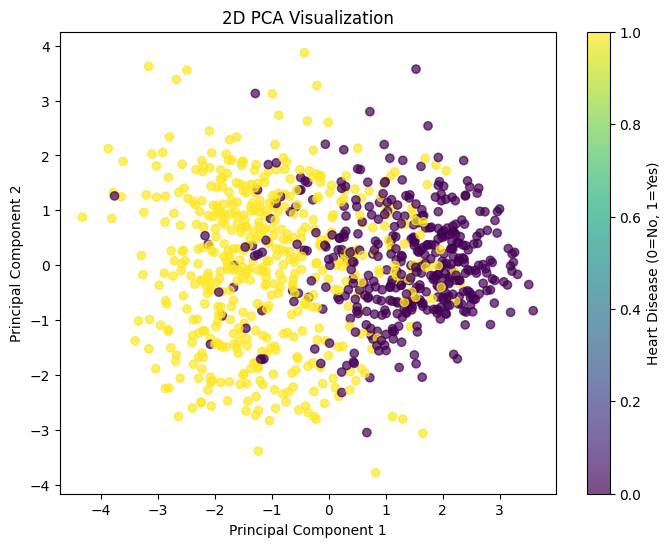

In [197]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca[:, 0], pca[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()

### Handle Outliers

In [175]:
def handle_outliers(df, features, threshold=3):
    for feature in features:
        z_scores = zscore(df[feature])
        outliers = (z_scores > abs(threshold))
        print(f"{outliers.sum()} outliers detected in '{feature}':")
        print(df[feature][outliers])
        print("-" * 50)
        # Replace outliers with NaN
        df.loc[outliers, feature] = np.nan
    return df

In [176]:
def handle_infrequent_categories(df, feature, threshold):
    value_counts = df[feature].value_counts()
    print(value_counts)
    frequent_categories = value_counts[value_counts >= threshold].index
    df[feature] = df[feature].apply(lambda x: x if x in frequent_categories else np.nan)  # Replace infrequent categories
    return df

In [206]:
len(df)

918

In [207]:
Numerical_Features = df.select_dtypes(exclude=['object']).columns.tolist()
Numerical_Features.remove('HeartDisease')

print(Numerical_Features)
Categorical_Features = df.select_dtypes(include=['object']).columns.tolist()

for col in Categorical_Features:
    df = handle_infrequent_categories(df, col, len(df)*0.1)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [208]:
df= handle_outliers(df, Numerical_Features)

0 outliers detected in 'Age':
Series([], Name: Age, dtype: int64)
--------------------------------------------------
8 outliers detected in 'RestingBP':
109    190
241    200
365    200
399    200
449      0
592    190
732    200
759    192
Name: RestingBP, dtype: int64
--------------------------------------------------
3 outliers detected in 'Cholesterol':
76     529
149    603
616    564
Name: Cholesterol, dtype: int64
--------------------------------------------------
0 outliers detected in 'FastingBS':
Series([], Name: FastingBS, dtype: int64)
--------------------------------------------------
1 outliers detected in 'MaxHR':
390    60
Name: MaxHR, dtype: int64
--------------------------------------------------
6 outliers detected in 'Oldpeak':
166    5.0
702    4.2
771    5.6
791    4.2
850    6.2
900    4.4
Name: Oldpeak, dtype: float64
--------------------------------------------------


In [ ]:
imputer = KNNImputer(weights = 'uniform')
df[Numerical_Features] = imputer.fit_transform(df[Numerical_Features])

In [ ]:
labelEncoder = LabelEncoder()
for column in Categorical_Features:
    print(column)
    df[column]=labelEncoder.fit_transform(df[column])

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [ ]:
scaler = StandardScaler()
df[Numerical_Features] = scaler.fit_transform(df[Numerical_Features])

print(df.head())

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.461794     0.852067  -0.551341   
1 -0.478484    0              2   1.630346    -0.163324  -0.551341   
2 -1.751359    1              1  -0.122481     0.796174  -0.551341   
3 -0.584556    0              0   0.344939     0.153404  -0.551341   
4  0.051881    1              2   1.046070    -0.023591  -0.551341   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.386793               0 -0.859456         2             0  
1           1  0.754903               0  0.133647         1             1  
2           2 -1.535697               0 -0.859456         2             0  
3           1 -1.140766               1  0.630199         1             1  
4           1 -0.587862               0 -0.859456         2             0  


In [209]:
# tl3 bayes 3ayez label catogorical
df['HeartDisease'] = df['HeartDisease'].map({0: 'No', 1: 'Yes'})
print(df.head())

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA      140.0        289.0        0.0     Normal   
1  49.0   F           NAP      160.0        180.0        0.0     Normal   
2  37.0   M           ATA      130.0        283.0        0.0         ST   
3  48.0   F           ASY      138.0        214.0        0.0     Normal   
4  54.0   M           NAP      150.0        195.0        0.0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope HeartDisease  
0  172.0              N      0.0       Up           No  
1  156.0              N      1.0     Flat          Yes  
2   98.0              N      0.0       Up           No  
3  108.0              Y      1.5     Flat          Yes  
4  122.0              N      0.0       Up           No  


##

In [198]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Split data into training (60%), validation (20%), and testing (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Hyper parameter tuning for SVM

In [200]:
# hyperparameter grids
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

In [201]:
# Set up GridSearchCV for SVM
svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='f1_weighted', cv=5)

In [202]:
svm_grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
print("Best parameters for SVM:", svm_grid_search.best_params_)
best_svm_model = svm_grid_search.best_estimator_
y_val_pred_svm = best_svm_model.predict(X_val)


ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'M'

--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\L340 GAMING\AppData\Roaming\Python\Python310\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'F'


In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Validation Performance:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


Hyper Parameter tuning for Bayes

In [ ]:
# Define hyperparameter grids for Naive Bayes
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Set up GridSearchCV for Naïve Bayes
nb_model = GaussianNB()
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, scoring='f1_weighted', cv=5)

# Fit the grid search model
nb_grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
print("Best parameters for Naïve Bayes:", nb_grid_search.best_params_)
best_nb_model = nb_grid_search.best_estimator_
y_val_pred_nb = best_nb_model.predict(X_val)

# Evaluate the tuned models
evaluate_model(y_val, y_val_pred_svm, "Tuned SVM")
evaluate_model(y_val, y_val_pred_nb, "Tuned Naïve Bayes")

# Final Evaluation on Test Set
print("\nFinal Test Performance (Tuned SVM):")
y_test_pred_svm = best_svm_model.predict(X_test)
evaluate_model(y_test, y_test_pred_svm, "Tuned SVM")

print("\nFinal Test Performance (Tuned Naïve Bayes):")
y_test_pred_nb = best_nb_model.predict(X_test)
evaluate_model(y_test, y_test_pred_nb, "Tuned Naïve Bayes")

In [203]:
# Train Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_val_pred_nb = nb_model.predict(X_val)

ValueError: could not convert string to float: 'F'

In [204]:

# Train SVM
svm_model = SVC(kernel="linear", C=1, random_state=42)
svm_model.fit(X_train, y_train)
y_val_pred_svm = svm_model.predict(X_val)

ValueError: could not convert string to float: 'F'


Naïve Bayes Validation Performance:
              precision    recall  f1-score   support

     Malak_S       0.81      0.89      0.85        82
    Mariam_V       0.90      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8586956521739131


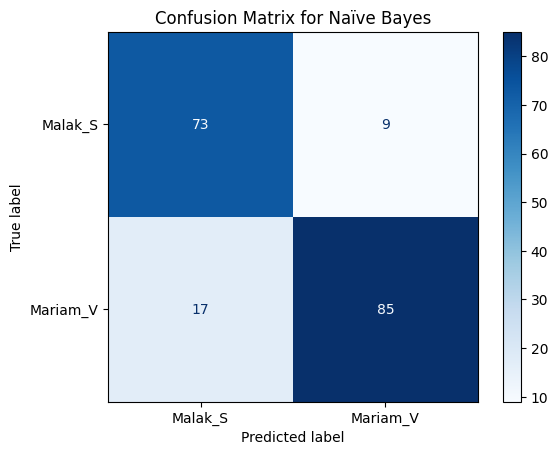


SVM Validation Performance:
              precision    recall  f1-score   support

     Malak_S       0.81      0.87      0.84        82
    Mariam_V       0.89      0.83      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.8478260869565217


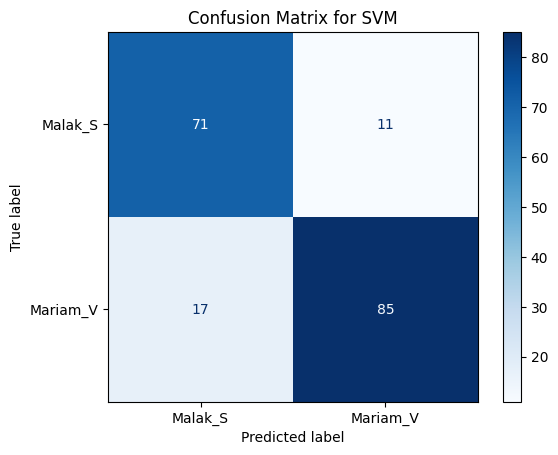


Final Test Performance (Naïve Bayes):

Naïve Bayes Validation Performance:
              precision    recall  f1-score   support

     Malak_S       0.84      0.80      0.82        82
    Mariam_V       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Accuracy: 0.842391304347826


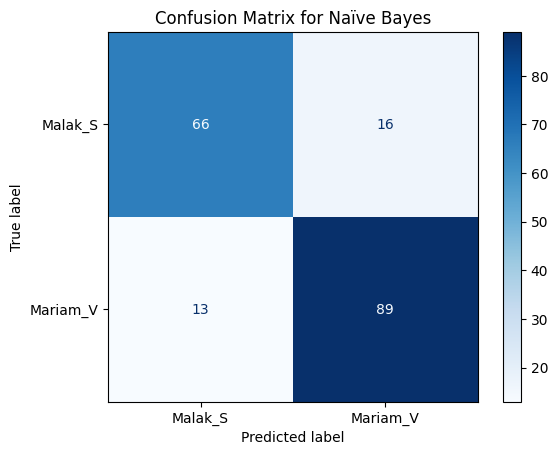


Final Test Performance (SVM):

SVM Validation Performance:
              precision    recall  f1-score   support

     Malak_S       0.86      0.79      0.82        82
    Mariam_V       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.8478260869565217


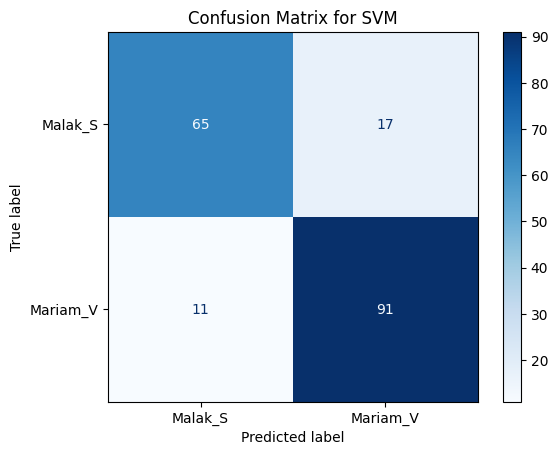

In [ ]:

# Evaluate on Validation Set
evaluate_model(y_val, y_val_pred_nb, "Naïve Bayes")
evaluate_model(y_val, y_val_pred_svm, "SVM")

# Final Evaluation on Test Set
print("\nFinal Test Performance (Naïve Bayes):")
y_test_pred_nb = nb_model.predict(X_test)
evaluate_model(y_test, y_test_pred_nb, "Naïve Bayes")

print("\nFinal Test Performance (SVM):")
y_test_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test, y_test_pred_svm, "SVM")

#**hehehehe as much as i recall fadel histogram and dendogram for this phase if exists t**

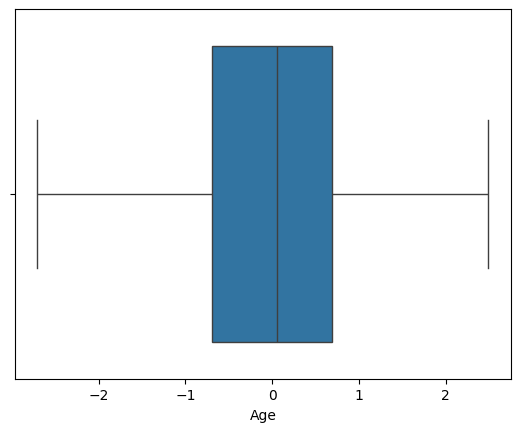

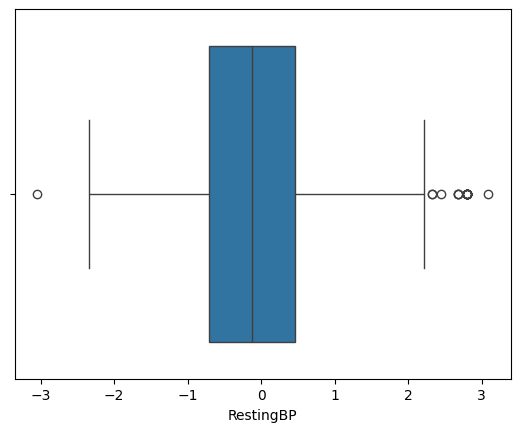

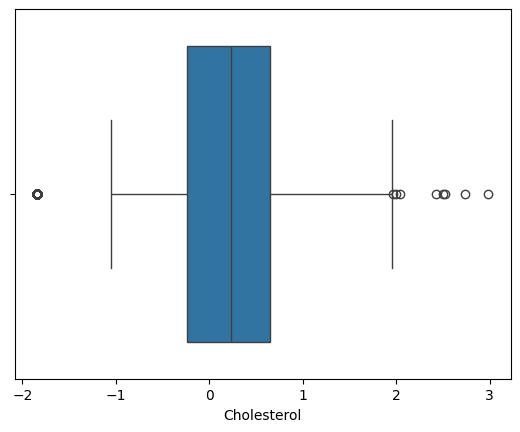

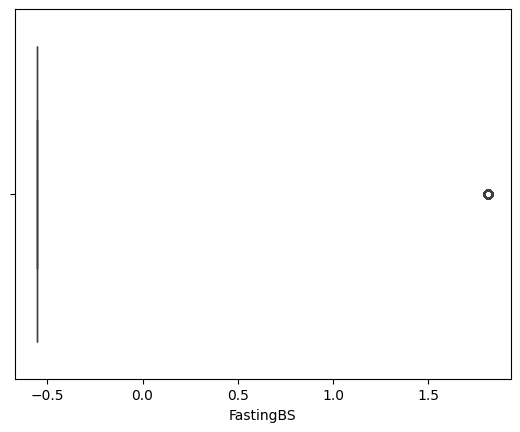

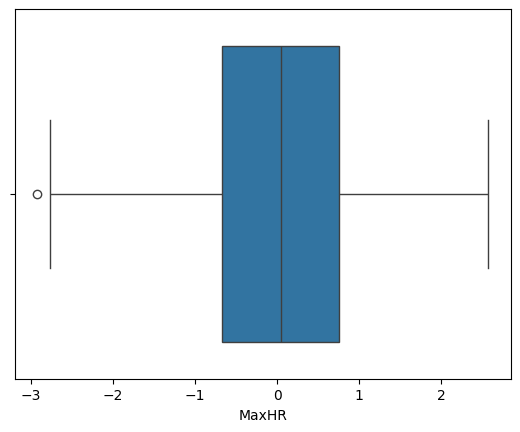

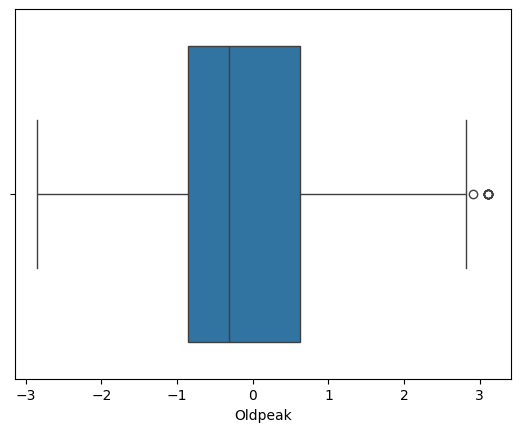

In [ ]:
import seaborn as sns
for feature in Numerical_Features:
    sns.boxplot(data=df, x=feature)
    plt.show()
